In [11]:
import numpy as np
import matplotlib.pyplot as plt

from SALib.sample import saltelli
from SALib.analyze import sobol

In [12]:
def parabola(x,R1,R2):
    return (1-x**3)*R1+x**3*R2

In [13]:
problem ={
    'num_vars': 2,
    'names': ['R1','R2'],
    'bounds': [[1000,2000]]*2
}

In [14]:
# sample
param_values = saltelli.sample(problem, 1000)

# print(param_values)

# evaluate
x = np.linspace(0, 1, 100)
y = np.array([parabola(x, *params) for params in param_values])

# print(param_values.shape)
# print(y.shape)
# print(y)
# analyse
sobol_indices = [sobol.analyze(problem, Y) for Y in y.T]

print("Sobol Indices")
# print(sobol_indices)

C:\Users\admin\AppData\Local\Temp\ipykernel_16128\380062146.py:2: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1000)
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\SALib\sample\saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)


Sobol Indices


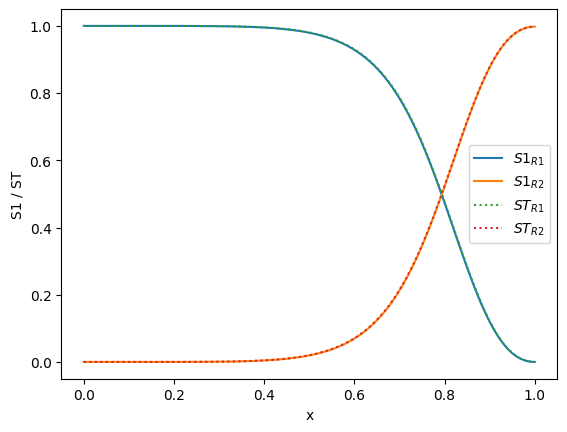

In [18]:
S1s = np.array([s['S1'] for s in sobol_indices])
STs = np.array([s['ST'] for s in sobol_indices])
fig, ax=plt.subplots()
ax.plot(x, S1s[:, 0],label="$S1_{R1}$")
ax.plot(x, S1s[:, 1],label="$S1_{R2}$")
ax.plot(x, STs[:, 0],":",label="$ST_{R1}$")
ax.plot(x, STs[:, 1],":",label="$ST_{R2}$")
# ax.set_xscale("log")
ax.set_ylabel("S1 / ST")
ax.set_xlabel("x")
ax.legend(loc="best")

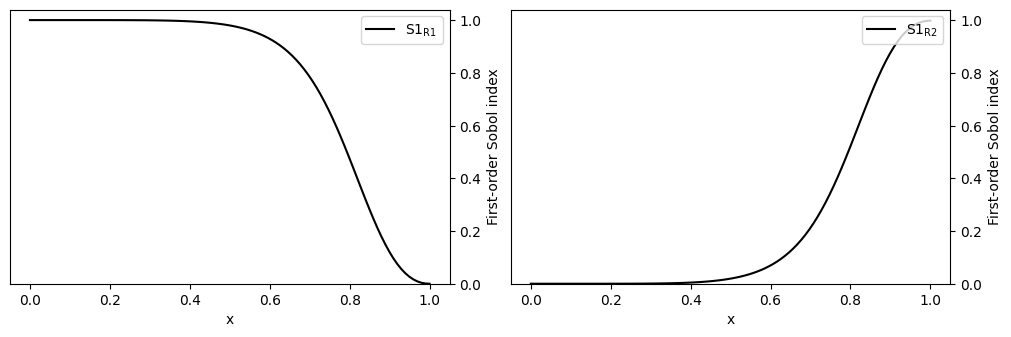

In [16]:
S1s = np.array([s['S1'] for s in sobol_indices])

fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(2, 2)

# ax0 = fig.add_subplot(gs[:, 0])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
# ax2 = fig.add_subplot(gs[1, 1])

for i, ax in enumerate([ax0, ax1]):
    ax.plot(x, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(problem["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.set_ylim(0, 1.04)

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    ax.legend(loc='upper right')

# ax0.plot(x, np.mean(y, axis=0), label="Mean", color='black')

# # in percent
# prediction_interval = 95

# ax0.fill_between(x,
#                  np.percentile(y, 50 - prediction_interval/2., axis=0),
#                  np.percentile(y, 50 + prediction_interval/2., axis=0),
#                  alpha=0.5, color='black',
#                  label=f"{prediction_interval} % prediction interval")

# ax0.set_xlabel("x")
# ax0.set_ylabel("y")
# ax0.legend(title=r"$y=a+b\cdot x^2$",
#            loc='upper center')._legend_box.align = "left"

plt.show()

In [17]:
# print(sobol_indices)